In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import os, sys, getpass
user = getpass.getuser()
sys.path.append(f'/home/{user}/codes/hpe_library/')
from lib_import import *
from my_utils import *
os.chdir('/home/hrai/codes/MotionBERT')

from lib.data.datareader_total import DataReaderTotal
from lib.data.datareader_h36m import DataReaderH36M
from lib.data.datareader_fit3d import DataReaderFIT3D
from lib.utils.args import get_opts_args
from lib.model.load_model import load_model
from lib.model.load_dataset import load_dataset
from lib.data.dataset_motion_3d import MotionDataset3DTotal
from lib.model.evaluation import *

In [2]:
subset = 'H36M-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_SAME_Z'
datareader = DataReaderTotal(n_frames=243, 
                                 sample_stride=1, 
                                 data_stride_train=81, 
                                 data_stride_test=243, 
                                 subset=subset)
train_data, test_data, train_labels, test_labels = datareader.get_sliced_data()
x_max = train_data[...,0].max(axis=-1)
x_min = train_data[...,0].min(axis=-1)
y_max = train_data[...,1].max(axis=-1)
y_min = train_data[...,1].min(axis=-1)
width = x_max - x_min
height = y_max - y_min
(width * height).mean(), width.mean(), height.mean()

==> Loading H36M source_list... overwrite: False
==> Loading H36M cam_param... overwrite: False
==> Loading H36M cam_3d same_z... overwrite: False
==> Loading H36M img_2d_canonical same_z... overwrite: False
==> Loading H36M cam_3d_canonical same_z... overwrite: False


(0.15614285, 0.25494722, 0.6073246)

In [6]:
subset = 'FIT3D-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_SAME_Z-ALL_TEST'
datareader = DataReaderTotal(n_frames=243, 
                                 sample_stride=1, 
                                 data_stride_train=81, 
                                 data_stride_test=243, 
                                 subset=subset)
train_data, test_data, train_labels, test_labels = datareader.get_sliced_data()
x_max = train_data[...,0].max(axis=-1)
x_min = train_data[...,0].min(axis=-1)
y_max = train_data[...,1].max(axis=-1)
y_min = train_data[...,1].min(axis=-1)
width = x_max - x_min
height = y_max - y_min
(width * height).mean(), width.mean(), height.mean()

==> Loading FIT3D source_list... overwrite: False
==> Loading FIT3D cam_param... overwrite: False
==> Loading FIT3D cam_3d same_z... overwrite: False
==> Loading FIT3D img_2d_canonical same_z... overwrite: False
==> Loading FIT3D cam_3d_canonical same_z... overwrite: False


(0.3912395, 0.37024987, 1.0541482)

In [3]:
subset = '3DHP-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_SAME_Z-TEST_TS1_6'
datareader = DataReaderTotal(n_frames=243, 
                                 sample_stride=1, 
                                 data_stride_train=81, 
                                 data_stride_test=243, 
                                 subset=subset)
train_data, test_data, train_labels, test_labels = datareader.get_sliced_data()
x_max = train_data[...,0].max(axis=-1)
x_min = train_data[...,0].min(axis=-1)
y_max = train_data[...,1].max(axis=-1)
y_min = train_data[...,1].min(axis=-1)
width = x_max - x_min
height = y_max - y_min
(width * height).mean(), width.mean(), height.mean()

==> Loading 3DHP source_list... overwrite: False
==> Loading 3DHP cam_param... overwrite: False
==> Loading 3DHP cam_3d same_z... overwrite: False
==> Loading 3DHP img_2d_canonical same_z... overwrite: False
==> Loading 3DHP cam_3d_canonical same_z... overwrite: False


(0.51276183, 0.6725978, 0.7623703)

In [4]:
subset = 'H36M-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_FIXED_DIST_5'
datareader = DataReaderTotal(n_frames=243, 
                                 sample_stride=1, 
                                 data_stride_train=81, 
                                 data_stride_test=243, 
                                 subset=subset)
train_data, test_data, train_labels, test_labels = datareader.get_sliced_data()
x_max = train_data[...,0].max(axis=-1)
x_min = train_data[...,0].min(axis=-1)
y_max = train_data[...,1].max(axis=-1)
y_min = train_data[...,1].min(axis=-1)
width = x_max - x_min
height = y_max - y_min
(width * height).mean(), width.mean(), height.mean()

==> Loading H36M source_list... overwrite: False
==> Loading H36M cam_param... overwrite: False
==> Loading H36M cam_3d fixed_dist_5... overwrite: False
==> Loading H36M img_2d_canonical fixed_dist_5... overwrite: False
==> Loading H36M cam_3d_canonical fixed_dist_5... overwrite: False


(0.15380217, 0.25703347, 0.6094526)

In [7]:
subset = 'FIT3D-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_FIXED_DIST_5-ALL_TEST'
datareader = DataReaderTotal(n_frames=243, 
                                 sample_stride=1, 
                                 data_stride_train=81, 
                                 data_stride_test=243, 
                                 subset=subset)
train_data, test_data, train_labels, test_labels = datareader.get_sliced_data()
x_max = train_data[...,0].max(axis=-1)
x_min = train_data[...,0].min(axis=-1)
y_max = train_data[...,1].max(axis=-1)
y_min = train_data[...,1].min(axis=-1)
width = x_max - x_min
height = y_max - y_min
(width * height).mean(), width.mean(), height.mean()

==> Loading FIT3D source_list... overwrite: False
==> Loading FIT3D cam_param... overwrite: False
==> Loading FIT3D cam_3d fixed_dist_5... overwrite: False
==> Loading FIT3D img_2d_canonical fixed_dist_5... overwrite: False
==> Loading FIT3D cam_3d_canonical fixed_dist_5... overwrite: False


(0.25106832, 0.296353, 0.8446991)

In [8]:
subset = '3DHP-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_FIXED_DIST_5-TEST_TS1_6'
datareader = DataReaderTotal(n_frames=243, 
                                 sample_stride=1, 
                                 data_stride_train=81, 
                                 data_stride_test=243, 
                                 subset=subset)
train_data, test_data, train_labels, test_labels = datareader.get_sliced_data()
x_max = train_data[...,0].max(axis=-1)
x_min = train_data[...,0].min(axis=-1)
y_max = train_data[...,1].max(axis=-1)
y_min = train_data[...,1].min(axis=-1)
width = x_max - x_min
height = y_max - y_min
(width * height).mean(), width.mean(), height.mean()

==> Loading 3DHP source_list... overwrite: False
==> Loading 3DHP cam_param... overwrite: False
==> Loading 3DHP cam_3d fixed_dist_5... overwrite: False
==> Loading 3DHP img_2d_canonical fixed_dist_5... overwrite: False
==> Loading 3DHP cam_3d_canonical fixed_dist_5... overwrite: False


(0.2131808, 0.43061543, 0.4960984)

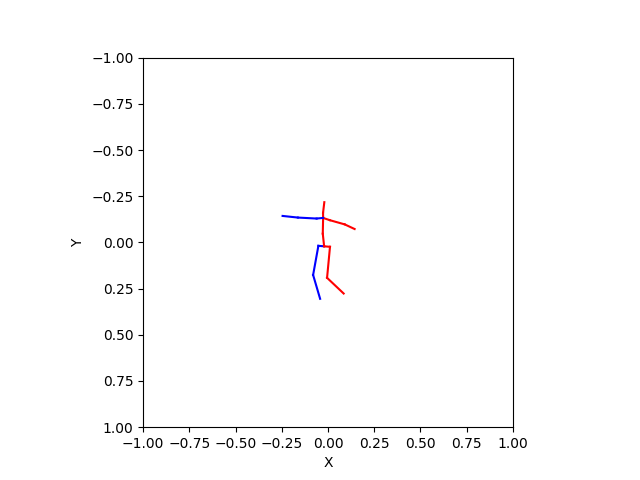

In [15]:
fig = plt.figure(0)
fig.clear()
ax = axes_2d(fig, normalize=True)
draw_2d_pose(ax, test_data[-1][-1], normalize=True)
plt.show()

In [14]:
test_data.shape

(90, 243, 17, 3)